<a href="https://colab.research.google.com/github/mikealeixogf/logic_fuzzy/blob/main/gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy

/bin/bash: pipt: command not found


## Aplicação 1 da lógica nebulosa (fuzzy)
O problema consiste em definir o valor da gorjeta de um restaurante com base na qualidade do serviço e comida.

* **Entrada (antecedentes):** 

> Qualidade da Comida
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): péssima, comível, deliciosa

> Qualidade do Serviço
>> Universo (intervalo de valores nítidos/*crisp*): 0 a 10

>> Conjunto difuso (valores difusos): ruim, aceitável, excelente


* **Saída (consequentes):**

> Gorjeta 

>> Universo (valores nítidos/*crisp*): 0 a 25%

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisões Difusas

> **SE** o serviço foi excelente **OU** a comida estava deliciosa **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser média

> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa


In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
comida.automf(names=['péssima', 'comível', 'deliciosa'])


# Cria as funções de pertinência usando tipos variados
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 3])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 12])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 12,16, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [16, 25, 25])


### Mostrando graficamente as funções de partinência criadas

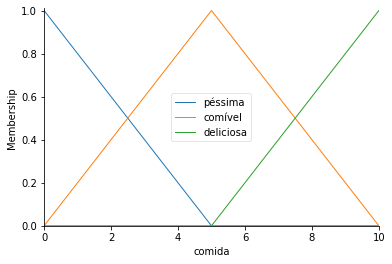

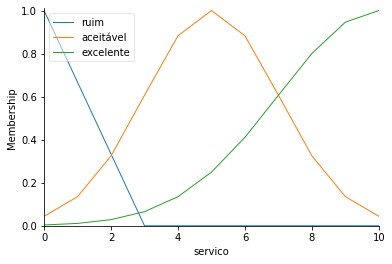

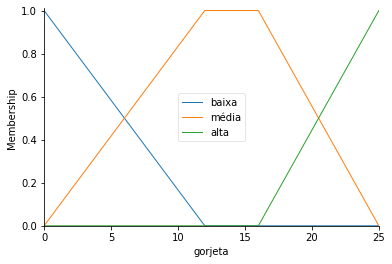

In [20]:
comida.view()
servico.view()
gorjeta.view()

### Criando as regras de decisão difusas

In [21]:
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

### Criando e simulando um controlador nebuloso

In [22]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])


18.51289133249491


### Mostrando graficamente o resultado

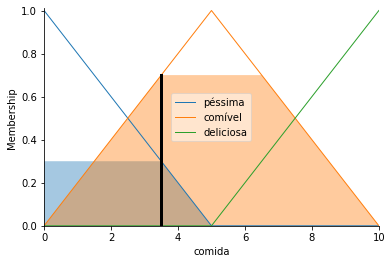

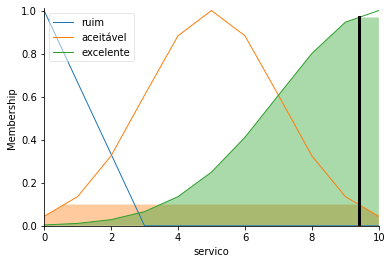

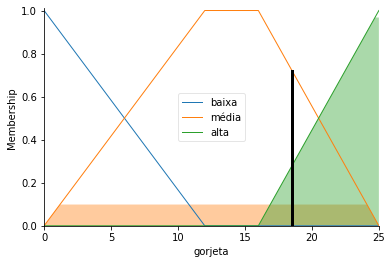

In [23]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)